# Set up workspace

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

In [250]:
import cartopy

In [12]:
import cftime
import scipy
import seaborn as sns
from load_gridcell_areas import *

In [5]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

import make_multisimulation_dataset

In [6]:
from load_ensembles import *
import quick_map

In [7]:
import make_multisimulation_dataset

# Parameter ranking

In [116]:
params=np.unique(crosswalk.param.values)

In [144]:
def get_minmax_match(param):
    minmatches=np.where(((crosswalk.minmax=='min')&(crosswalk.param==param)).values)
    maxmatches=np.where(((crosswalk.minmax=='max')&(crosswalk.param==param)).values)
    if np.size(minmatches)==1:
        minmatch=minmatches[0][0]
    else:
        print('Error!')
    if np.size(maxmatches)==1:
        maxmatch=maxmatches[0][0]
    else:
        print('Error!')
    return [minmatch, maxmatch]

In [187]:
ensemble_coupled = load_coupled_ensemble(var='calculated_PRECT', domain='lnd', printon=False)
ds_grid=ensemble_coupled[0]
param_ranges = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='calculated_PRECT', keys=params)
param_significant = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='calculated_PRECT', keys=params)

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/das

In [170]:
for i, param in enumerate(params):
    [minmatch, maxmatch]=get_minmax_match(param)
    
    array_max=PRECT_delta_pct_annual[:,:,maxmatch]
    array_min=PRECT_delta_pct_annual[:,:,minmatch]
    param_range=array_max-array_min
    param_ranges[:,:,i]=param_range

In [203]:
for i, param in enumerate(params):
    [minmatch, maxmatch]=get_minmax_match(param)
    
    pval_max=pval_annual[:,:,maxmatch]
    pval_min=pval_annual[:,:,minmatch]
    
    sig_max=pval_max<=0.05
    sig_min=pval_min<=0.05
    
    sig_either = (sig_max | sig_min)
    param_significant[:,:,i]=sig_either
    #param_range=array_max-array_min
    #param_ranges[:,:,i]=param_range

In [205]:
precip_delta=(np.abs(param_ranges)*landweights).mean(dim=['lat','lon'])
precip_sig=(param_significant*landweights).mean(dim=['lat','lon'])
for i,param in enumerate(params):
    #print(param)
    print(precip_sig.values[i])

0.5207405290069678
0.5616294125234129
0.5761616347597345
0.3618269320045645
0.3535952013839602
0.4863150883084563
0.18536084737139533
0.4931476901558534
0.4441503331776511
0.4772579563566643
0.3549367267745553
0.27005528330181516
0.0845381841359777
0.21014787748399827
0.14865819768664718
0.12346710700280715
0.3101444571585478
0.24155344510579949


In [147]:
plt.subplot(4,5,1)
for i, param in enumerate(params):
    

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 96, lon: 144)>
array([[5.995208, 5.995139, 5.995352, ..., 5.995026, 5.995191, 5.995108],
       [4.354244, 4.094193, 3.955716, ..., 4.896523, 4.72144 , 4.582357],
       [1.991783, 1.910652, 1.948651, ..., 1.929134, 1.988616, 2.047444],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]])
Coordinates:
  * lat      (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

# Seasonality

### Load data

In [9]:
PRECT_delta_annual=xr.open_dataset('data/PRECT_delta_Annual.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_JJA=xr.open_dataset('data/PRECT_delta_JJA.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_SON=xr.open_dataset('data/PRECT_delta_SON.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_DJF=xr.open_dataset('data/PRECT_delta_DJF.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_MAM=xr.open_dataset('data/PRECT_delta_MAM.nc')['__xarray_dataarray_variable__'].load()

PRECT_delta_pct_annual=xr.open_dataset('data/PRECT_delta_pct_Annual.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_pct_JJA=xr.open_dataset('data/PRECT_delta_pct_JJA.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_pct_SON=xr.open_dataset('data/PRECT_delta_pct_SON.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_pct_DJF=xr.open_dataset('data/PRECT_delta_pct_DJF.nc')['__xarray_dataarray_variable__'].load()
PRECT_delta_pct_MAM=xr.open_dataset('data/PRECT_delta_pct_MAM.nc')['__xarray_dataarray_variable__'].load()

pval_annual=xr.open_dataset('data/PRECT_pval_Annual.nc')['__xarray_dataarray_variable__'].load()
pval_JJA=xr.open_dataset('data/PRECT_pval_JJA.nc')['__xarray_dataarray_variable__'].load()
pval_SON=xr.open_dataset('data/PRECT_pval_JJA.nc')['__xarray_dataarray_variable__'].load()
pval_DJF=xr.open_dataset('data/PRECT_pval_DJF.nc')['__xarray_dataarray_variable__'].load()
pval_MAM=xr.open_dataset('data/PRECT_pval_MAM.nc')['__xarray_dataarray_variable__'].load()

In [43]:
PRECT_range_annual_pct=((PRECT_delta_pct_annual.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_pct_annual.quantile(0.05, dim='ensemble_key')))
PRECT_range_JJA_pct=((PRECT_delta_pct_JJA.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_pct_JJA.quantile(0.05, dim='ensemble_key')))
PRECT_range_SON_pct=((PRECT_delta_pct_SON.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_pct_SON.quantile(0.05, dim='ensemble_key')))
PRECT_range_DJF_pct=((PRECT_delta_pct_DJF.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_pct_DJF.quantile(0.05, dim='ensemble_key')))
PRECT_range_MAM_pct=((PRECT_delta_pct_MAM.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_pct_MAM.quantile(0.05, dim='ensemble_key')))

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


In [379]:
PRECT_range_annual_pct=((PRECT_delta_pct_annual.max(dim='ensemble_key'))-
           (PRECT_delta_pct_annual.min(dim='ensemble_key')))
PRECT_range_JJA_pct=((PRECT_delta_pct_JJA.min(dim='ensemble_key'))-
           (PRECT_delta_pct_JJA.min(dim='ensemble_key')))
PRECT_range_SON_pct=((PRECT_delta_pct_SON.max(dim='ensemble_key'))-
           (PRECT_delta_pct_SON.min(dim='ensemble_key')))
PRECT_range_DJF_pct=((PRECT_delta_pct_DJF.max(dim='ensemble_key'))-
           (PRECT_delta_pct_DJF.min(dim='ensemble_key')))
PRECT_range_MAM_pct=((PRECT_delta_pct_MAM.max(dim='ensemble_key'))-
           (PRECT_delta_pct_MAM.min(dim='ensemble_key')))

In [44]:
PRECT_range_annual=((PRECT_delta_annual.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_annual.quantile(0.05, dim='ensemble_key')))
PRECT_range_JJA=((PRECT_delta_JJA.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_JJA.quantile(0.05, dim='ensemble_key')))
PRECT_range_SON=((PRECT_delta_SON.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_SON.quantile(0.05, dim='ensemble_key')))
PRECT_range_DJF=((PRECT_delta_DJF.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_DJF.quantile(0.05, dim='ensemble_key')))
PRECT_range_MAM=((PRECT_delta_MAM.quantile(0.95, dim='ensemble_key'))-
           (PRECT_delta_MAM.quantile(0.05, dim='ensemble_key')))

In [373]:
PRECT_range_annual=((PRECT_delta_annual.max(dim='ensemble_key'))-
           (PRECT_delta_annual.min(dim='ensemble_key')))
PRECT_range_JJA=((PRECT_delta_JJA.max(dim='ensemble_key'))-
           (PRECT_delta_JJA.min(dim='ensemble_key')))
PRECT_range_SON=((PRECT_delta_SON.max(dim='ensemble_key'))-
           (PRECT_delta_SON.min(dim='ensemble_key')))
PRECT_range_DJF=((PRECT_delta_DJF.max(dim='ensemble_key'))-
           (PRECT_delta_DJF.min(dim='ensemble_key')))
PRECT_range_MAM=((PRECT_delta_MAM.max(dim='ensemble_key'))-
           (PRECT_delta_MAM.min(dim='ensemble_key')))

NameError: name 'ax' is not defined

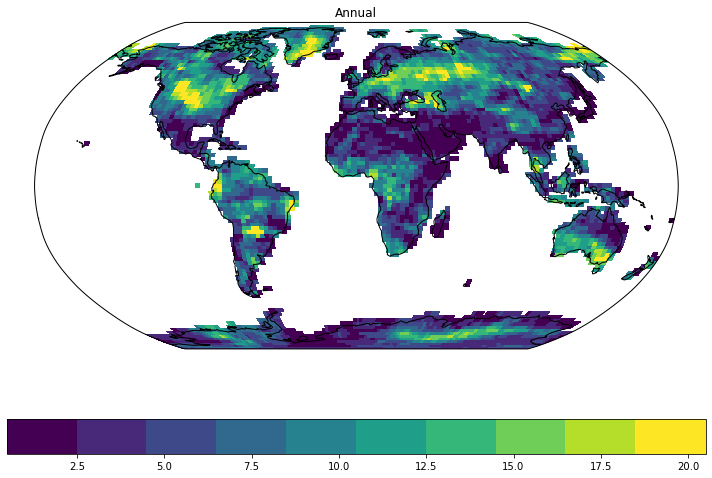

In [241]:
mapdata=(pval_annual<0.05).sum(dim='ensemble_key')
plt.figure(figsize=(10,7))
quick_map2(mapdata.where(landweights>0), nrow=1,ncol=1,ind=0,
           title='Annual',cmap=plt.cm.get_cmap("viridis",10), clims=[0.5,20.5])
ax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

In [374]:
def quick_map2(mapdata, nrow=3,ncol=3, ind=0,title=None, outpath=None, 
               colorlabel=None, cmap=plt.cm.get_cmap("magma", 10), clims=None, sigmask=None):
    ax = plt.subplot(nrow, ncol, ind+1, projection=ccrs.Robinson())
    ax.coastlines()
    ax.set_global()

    cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=mapdata.lon)

    plt.pcolormesh(cyclic_lons, mapdata.lat, #contourf
                   cyclic_data, 
                   cmap=cmap,
                   transform=ccrs.PlateCarree())
    if clims is not None:
        plt.pcolormesh(cyclic_lons, mapdata.lat, #contourf
                   cyclic_data, 
                   cmap=cmap,
                   transform=ccrs.PlateCarree(), vmin=clims[0], vmax=clims[1])
    else:
        plt.pcolormesh(cyclic_lons, mapdata.lat, #contourf
                   cyclic_data, 
                   cmap=cmap,
                   transform=ccrs.PlateCarree())
        
    if colorlabel is None:
        plt.colorbar(orientation='horizontal', extend='max')
    else:
        plt.colorbar(orientation='horizontal', label=colorlabel)
        
    if sigmask is not None:
        cyclic_data_mask, cyclic_lons_mask = add_cyclic_point(sigmask, coord=sigmask.lon)
        cs = plt.contourf(
            cyclic_lons_mask, sigmask.lat, cyclic_data_mask,
            transform=ccrs.PlateCarree(),
            colors='none',
            linecolors='gray',
            edgecolors='gray',
            levels=[0.5, 1.5],
            hatches=['..'])
        #, extend='both')
    
    #cs.collections[0].set_linecolor('white')
    
    if title is not None: plt.title(title)

    if outpath is not None:
        plt.savefig(outpath)
    
    ax.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k', facecolor='white')

    plt.tight_layout()

In [411]:
nrow=1
ncol=4
cmap=plt.get_cmap("inferno",10)
clims=[15,20]

In [412]:
sigmask=((pval_annual<0.05).sum(dim='ensemble_key')<10).where(landweights>0)

In [413]:
#import matplotlib as mpl
#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["#F5F0AE","#F58079"],10)

#cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["#F5F0AE","#F3B2B6","#9D9FF5"],10)



In [441]:
ref_PRECT_mmday=(PRECT_delta_annual*100/PRECT_delta_pct_annual)[:,:,0]

In [434]:
i=7
print(np.nanmax(ref_PRECT_mmday[:,:,0]-ref_PRECT_mmday[:,:,i]))
print(np.nanmin(ref_PRECT_mmday[:,:,0]-ref_PRECT_mmday[:,:,i]))

1.7763568394002505e-15
-1.7763568394002505e-15


In [414]:
(ref_tseries*unitconv)==var_array_avg_delta/(PRECT_range_annual_pct/100)

<xarray.DataArray ()>
array(18.150297)

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(array([9.780e+02, 2.825e+03, 1.248e+03, 3.570e+02, 1.750e+02, 4.900e+01,
        2.100e+01, 8.000e+00, 3.000e+00, 2.000e+00]),
 array([ 2.20127926,  9.87022262, 17.53916598, 25.20810934, 32.8770527 ,
        40.54599606, 48.21493942, 55.88388278, 63.55282614, 71.2217695 ,
        78.89071286]),
 <a list of 10 Patch objects>)

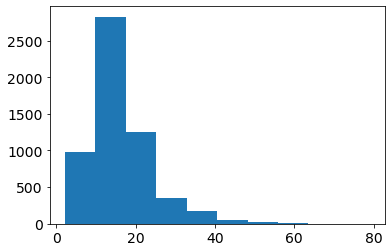

In [415]:
plt.hist(PRECT_range_annual_pct.values.flatten()[landweights.values.flatten()>0])

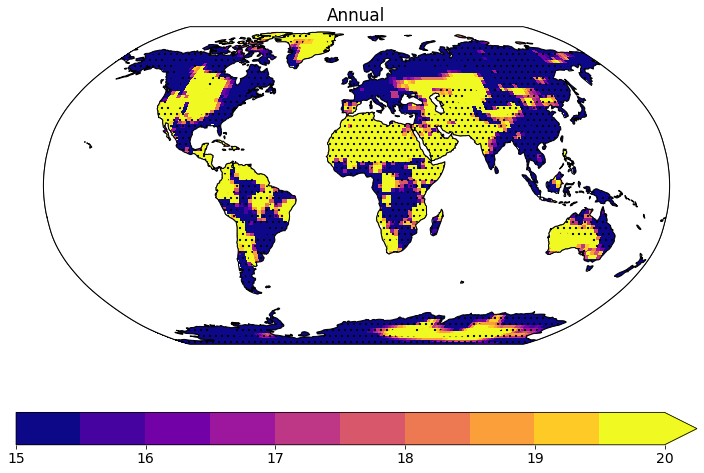

In [416]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,7))
quick_map2(PRECT_range_annual_pct.where(landweights>0), nrow=1,ncol=1,ind=0,
           title='Annual',cmap=plt.cm.get_cmap("plasma",10), clims=clims, sigmask=sigmask)

In [75]:
nrow=1
ncol=4
cmap=plt.get_cmap("inferno",10)
clims=[0,40]

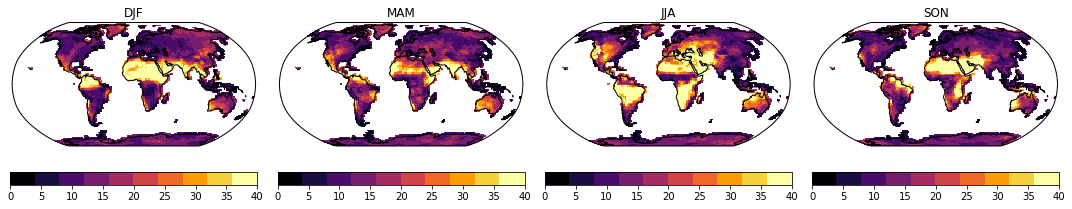

In [72]:
plt.figure(figsize=(15,3))
plt.subplot(nrow,ncol,1)
quick_map2(PRECT_range_DJF_pct.where(landweights>0), nrow=nrow,ncol=ncol,ind=0,
           title='DJF',cmap=cmap, clims=clims)

quick_map2(PRECT_range_MAM_pct.where(landweights>0), nrow=nrow,ncol=ncol, ind=1, 
           title='MAM',cmap=cmap, clims=clims)

quick_map2(PRECT_range_JJA_pct.where(landweights>0), nrow=nrow,ncol=ncol, ind=2,
           title='JJA',cmap=cmap, clims=clims)

quick_map2(PRECT_range_SON_pct.where(landweights>0), nrow=nrow,ncol=ncol, ind=3, 
           title='SON',cmap=cmap, clims=clims)

### Absolute changes

In [76]:
nrow=1
ncol=4
cmap=plt.get_cmap("inferno",10)
clims=[0,0.5]

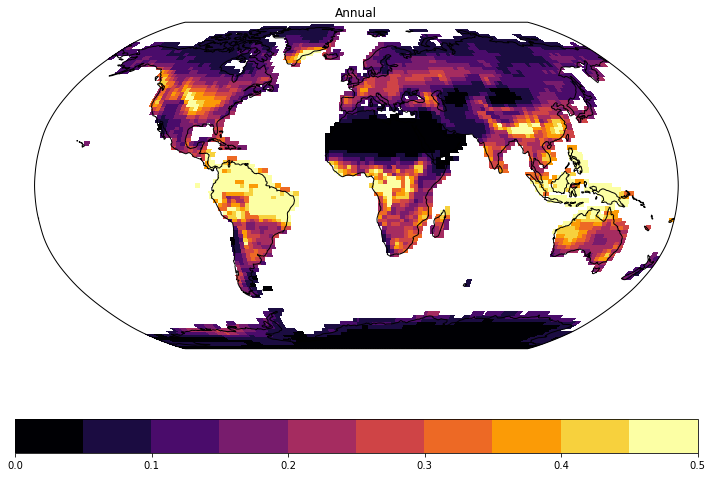

In [77]:
plt.figure(figsize=(10,7))
quick_map2(PRECT_range_annual.where(landweights>0), nrow=1,ncol=1,ind=0,
           title='Annual',cmap=cmap, clims=clims)

In [64]:
nrow=1
ncol=4
cmap=plt.get_cmap("inferno",10)
clims=[0,1]

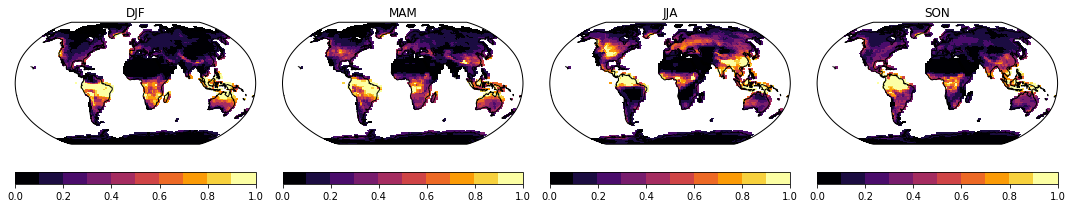

In [65]:
plt.figure(figsize=(15,3))
plt.subplot(nrow,ncol,1)
quick_map2(PRECT_range_DJF.where(landweights>0), nrow=nrow,ncol=ncol,ind=0,
           title='DJF',cmap=cmap, clims=clims)

quick_map2(PRECT_range_MAM.where(landweights>0), nrow=nrow,ncol=ncol, ind=1, 
           title='MAM',cmap=cmap, clims=clims)

quick_map2(PRECT_range_JJA.where(landweights>0), nrow=nrow,ncol=ncol, ind=2,
           title='JJA',cmap=cmap, clims=clims)

quick_map2(PRECT_range_SON.where(landweights>0), nrow=nrow,ncol=ncol, ind=3, 
           title='SON',cmap=cmap, clims=clims)

# Ts vs Precip

In [94]:
annual_delta=xr.open_dataset('data/Annual_PRECT_delta.nc')['__xarray_dataarray_variable__'].load()
annual_pval=xr.open_dataset('data/Annual_PRECT_pval.nc')['__xarray_dataarray_variable__'].load()
annual_Ts_delta=xr.open_dataset('data/TSKIN_delta.nc')['__xarray_dataarray_variable__'].load()
annual_Ts_pval=xr.open_dataset('data/TSKIN_pval.nc')['__xarray_dataarray_variable__'].load()

In [32]:
delta_Ts_global=(annual_Ts_delta*landweights).mean(dim=['lat','lon'])

In [24]:
landmask_flat=landweights.values.flatten()
i=3
array_flat_1ens=annual_delta[:,:,i].values.flatten()[landmask_flat>0]

/ncar/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
decrease_precip=((annual_delta<0)&(annual_pval<=0.05))
increase_precip=((annual_delta>0)&(annual_pval<=0.05))
increase_precip_global=(increase_precip*landweights).mean(dim=['lat','lon'])*100
decrease_precip_global=(decrease_precip*landweights).mean(dim=['lat','lon'])*100

In [82]:
decrease_Ts=((annual_Ts_delta<0)&(annual_Ts_pval<=0.05))
increase_Ts=((annual_Ts_delta>0)&(annual_Ts_pval<=0.05))
increase_Ts_global=(increase_Ts*landweights).mean(dim=['lat','lon'])*100
decrease_Ts_global=(decrease_Ts*landweights).mean(dim=['lat','lon'])*100

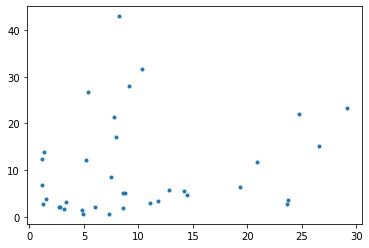

In [85]:
plt.plot(increase_precip_global, decrease_precip_global,'.')

(-5, 50)

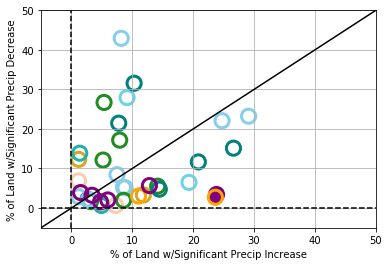

In [99]:
#plt.plot(sig_change_Ts_global,sig_change_global, '.')
plt.plot([-5,50], [-5,50],'-k')
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
for i, increase_precip in enumerate(increase_precip_global):
    if crosswalk.description.values[i]=='zetamaxstable, max':
        plt.scatter(increase_precip, decrease_precip_global[i],s=200,edgecolors=colors[i], linewidth=3, facecolors=colors[i])
for i, increase_precip in enumerate(increase_precip_global):
    if crosswalk.description.values[i]!='zetamaxstable, max':
        plt.scatter(increase_precip, decrease_precip_global[i],s=200,edgecolors=colors[i], linewidth=3, facecolors='none')

plt.grid()
plt.xlabel('% of Land w/Significant Precip Increase')
plt.ylabel('% of Land w/Significant Precip Decrease')
plt.ylim([-5,50])
plt.xlim([-5,50])

(-10, 110)

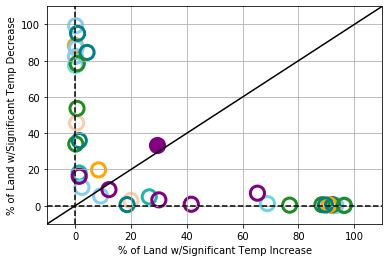

In [95]:
#plt.plot(sig_change_Ts_global,sig_change_global, '.')
plt.plot([-10,110], [-10,110],'-k')
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
for i, increase_Ts in enumerate(increase_Ts_global):
    if crosswalk.description.values[i]=='zetamaxstable, max':
        plt.scatter(increase_Ts, decrease_Ts_global[i],s=200,edgecolors=colors[i], linewidth=3, facecolors=colors[i])
    else:
        plt.scatter(increase_Ts, decrease_Ts_global[i],s=200,edgecolors=colors[i], linewidth=3, facecolors='none')
plt.grid()
plt.xlabel('% of Land w/Significant Temp Increase')
plt.ylabel('% of Land w/Significant Temp Decrease')
plt.ylim([-10,110])
plt.xlim([-10,110])

In [37]:
sig_change=(annual_pval<=0.05)
sig_change_global=(sig_change*landweights).mean(dim=['lat','lon'])*100

In [95]:
sig_change_Ts=(annual_Ts_pval<=0.05)
sig_change_Ts_global=(sig_change_Ts*landweights).mean(dim=['lat','lon'])*100

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 96, lon: 144)>
array([[16, 16, 16, ..., 16, 16, 16],
       [16, 16, 17, ..., 16, 16, 16],
       [17, 17, 18, ..., 16, 17, 17],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])
Coordinates:
  * lat      (lat) float32 -90.0 -88.10526 -86.210526 ... 88.10526 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

(-10, 110)

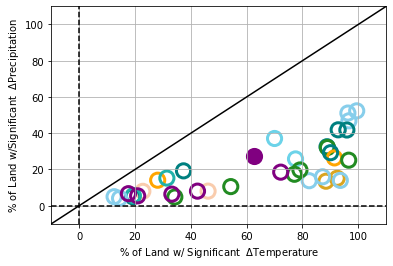

In [96]:
#plt.plot(sig_change_Ts_global,sig_change_global, '.')
plt.plot([-10,110], [-10,110],'-k')
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
for i, sig_Ts in enumerate(sig_change_Ts_global):
    if crosswalk.description.values[i]=='zetamaxstable, max':
        plt.scatter(sig_Ts, sig_change_global[i],s=200,edgecolors=colors[i], linewidth=3, facecolors=colors[i])
    else:
        plt.scatter(sig_Ts, sig_change_global[i],s=200,edgecolors=colors[i], linewidth=3, facecolors='none')
plt.grid()
plt.xlabel('% of Land w/ Significant  $\Delta$Temperature')
plt.ylabel('% of Land w/Significant  $\Delta$Precipitation')
plt.ylim([-10,110])
plt.xlim([-10,110])

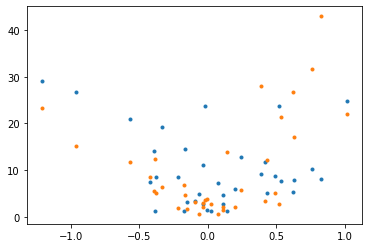

In [36]:
plt.plot(delta_Ts_global, increase_precip_global, '.')
plt.plot(delta_Ts_global, decrease_precip_global, '.')

In [77]:
colors=['goldenrod',
        'goldenrod',
        'skyblue',
        'skyblue',
        'skyblue',
        'skyblue',
        '#6CD3E9',
        '#6CD3E9',
        'skyblue',
        'skyblue',
        '#F9CCAD',
        '#F9CCAD',
        'teal',
        'teal',
        'forestgreen',
        'forestgreen',
        'forestgreen',
        'forestgreen',
        'forestgreen',
        'teal',
        'teal',
        'orange',
        'orange',
        'lightseagreen',
        'lightseagreen',
        'teal',
        'forestgreen',
        'teal',
        'skyblue',
        'skyblue',
        'purple',
        'purple',
        'purple',
        'purple',
        'purple',
        'purple']

In [78]:
for i,desc in enumerate(crosswalk.description.values):
    print(desc)
    print(colors[i])
    print('-----')

rhosnir, min
goldenrod
-----
rhosnir, max
goldenrod
-----
d_max, min
skyblue
-----
d_max, max
skyblue
-----
frac_sat_soil_dsl_init, min
skyblue
-----
frac_sat_soil_dsl_init, max
skyblue
-----
maximum_leaf_wetted_fraction, min
#6CD3E9
-----
maximum_leaf_wetted_fraction, max
#6CD3E9
-----
fff, min
skyblue
-----
fff, max
skyblue
-----
upplim_destruct_metamorph, min
#F9CCAD
-----
upplim_destruct_metamorph, max
#F9CCAD
-----
medlynslope, max
teal
-----
medlynintercept, min
teal
-----
tpu25ratio, min
forestgreen
-----
tpu25ratio, max
forestgreen
-----
jmaxb0, max
forestgreen
-----
jmaxb1, min
forestgreen
-----
jmaxb1, max
forestgreen
-----
kmax, min
teal
-----
kmax, max
teal
-----
nstem, min
orange
-----
nstem, max
orange
-----
lmrha, min
lightseagreen
-----
lmrha, max
lightseagreen
-----
medlynslope, min
teal
-----
jmaxb0, min
forestgreen
-----
medlynintercept, max
teal
-----
sand_pf, min
skyblue
-----
sand_pf, max
skyblue
-----
z0mr, min
purple
-----
z0mr, max
purple
-----
zsno, min
purple

In [79]:
len(colors)

36

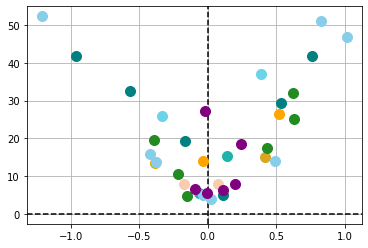

In [80]:
plt.plot(delta_Ts_global, sig_change_global, '.')
plt.grid()
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
for i, Ts in enumerate(delta_Ts_global):
    plt.plot(Ts, sig_change_global[i],'o',markersize=10,color=colors[i])

In [27]:
!pip install -U ridgeplot

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 70.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 42.2 MB/s eta 0:00:0000:0100:01


In [28]:
import numpy as np

from ridgeplot import ridgeplot

# Put your real samples here...
np.random.seed(0)
synthetic_samples = [np.random.normal(n / 1.2, size=600) for n in range(9, 0, -1)]

# Call the `ridgeplot()` helper, packed with sensible defaults
fig = ridgeplot(samples=synthetic_samples)

# The returned Plotly `Figure` is still fully customizable
fig.update_layout(height=500, width=800)

# show us the work!
fig.show()

ModuleNotFoundError: No module named 'ridgeplot'

In [26]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

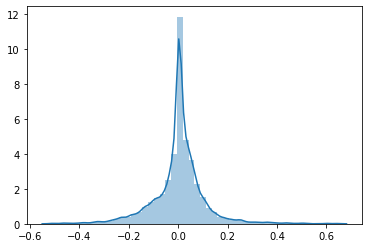

In [25]:
sns.distplot(array_flat_1ens)